# **IMPORT LIBRARIES**

In [117]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.preprocessing import PolynomialFeatures

# **LOAD DATASET**

In [118]:
df = pd.read_csv("Car details v3.csv")
print("First 5 rows:")
print(df.head())
print("Shape:", df.shape)
print(df.info())

First 5 rows:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0 

# **DATA CLEANING**

In [119]:
def extract_num(col):
    return col.str.extract(r'(\d+\.?\d*)')[0].astype(float)

if 'mileage' in df.columns:
    df['mileage'] = extract_num(df['mileage'])

if 'engine' in df.columns:
    df['engine'] = extract_num(df['engine'])

if 'max_power' in df.columns:
    df['max_power'] = extract_num(df['max_power'])

In [120]:
df = df.drop_duplicates()


In [121]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in [np.float64, np.int64]:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

In [122]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.describe())
print("Missing values:\n", df.isnull().sum())

              name         year  selling_price     km_driven         fuel  \
count  6926.000000  6926.000000   6.926000e+03  6.926000e+03  6926.000000   
mean   1052.784724  2013.420300   5.172707e+05  7.399568e+04     1.885937   
std     536.398757     4.078286   5.197670e+05  5.835810e+04     1.002948   
min       0.000000  1983.000000   2.999900e+04  1.000000e+00     0.000000   
25%     630.250000  2011.000000   2.500000e+05  4.000000e+04     1.000000   
50%    1098.000000  2014.000000   4.000000e+05  7.000000e+04     1.000000   
75%    1408.000000  2017.000000   6.335000e+05  1.000000e+05     3.000000   
max    2057.000000  2020.000000   1.000000e+07  2.360457e+06     3.000000   

       seller_type  transmission        owner      mileage       engine  \
count  6926.000000   6926.000000  6926.000000  6926.000000  6926.000000   
mean      0.905573      0.915680     0.906151    19.464550  1425.398787   
std       0.305484      0.277887     1.260279     3.987878   487.026967   
min   

# **CORRELATION ANALYSIS**

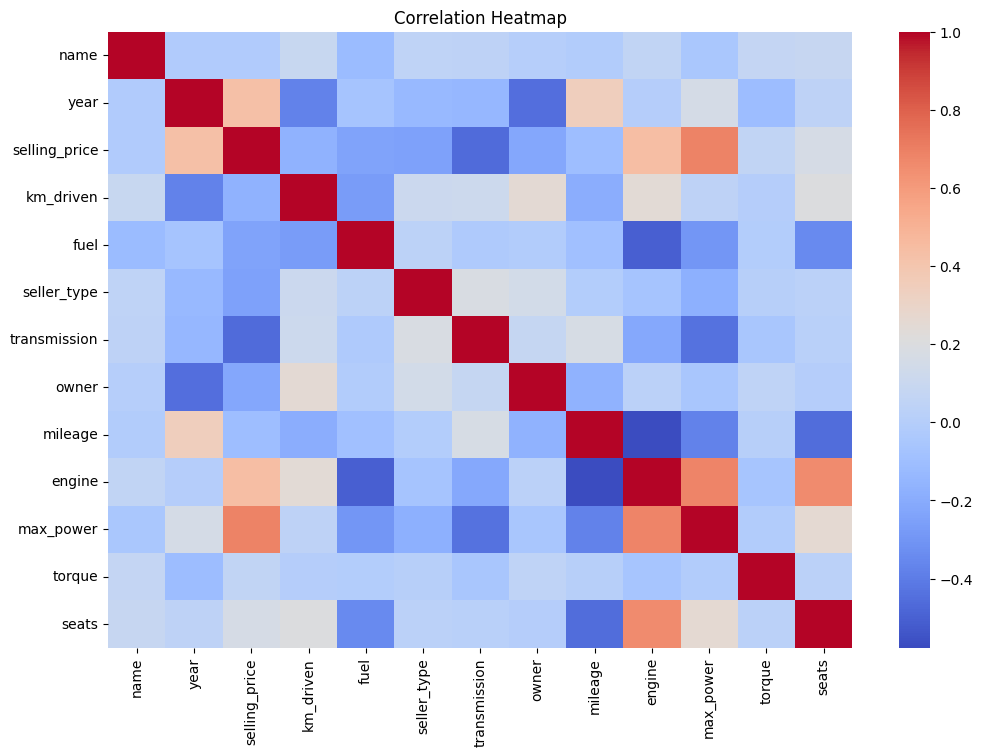

In [123]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# **FEATURE SELECTION**

In [124]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

# **TRAIN-TEST SPLIT + SCALING**

In [125]:
scaler = StandardScaler()

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reg_s = scaler.fit_transform(X_train_reg)
X_test_reg_s = scaler.transform(X_test_reg)

# **SIMPLE LINEAR REGRESSION**

In [126]:
X_year = df[['year']]
y_year = df['selling_price']

X1_train, X1_test, y1_train, y1_test = train_test_split(X_year, y_year, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X1_train, y1_train)
y_pred_lr = linreg.predict(X1_test)

print("\n--- SIMPLE LINEAR REGRESSION ---")
print("MAE:", mean_absolute_error(y1_test, y_pred_lr))
print("MSE:", mean_squared_error(y1_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_lr)))
print("R2 Score:", r2_score(y1_test, y_pred_lr))


--- SIMPLE LINEAR REGRESSION ---
MAE: 218024.9066188793
MSE: 171666049656.5033
RMSE: 414326.0185608711
R2 Score: 0.2172862693539226


# **MULTIPLE LINEAR REGRESSION**

In [127]:
mlr = LinearRegression()
mlr.fit(X_train_reg_s, y_train_reg)
y_pred_mlr = mlr.predict(X_test_reg_s)

print("\n--- MULTIPLE LINEAR REGRESSION ---")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_mlr))
print("MSE:", mean_squared_error(y_test_reg, y_pred_mlr))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_mlr)))
print("R2 Score:", r2_score(y_test_reg, y_pred_mlr))


--- MULTIPLE LINEAR REGRESSION ---
MAE: 169930.5996721692
MSE: 91924193561.09218
RMSE: 303190.02879562543
R2 Score: 0.5808703664888646


# **POLYNOMIAL REGRESSION**

In [128]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_reg_s)
X_poly_test = poly.transform(X_test_reg_s)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train_reg)
y_pred_poly = poly_model.predict(X_poly_test)

print("\n--- POLYNOMIAL REGRESSION ---")
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_poly)))


--- POLYNOMIAL REGRESSION ---
RMSE: 208531.4045898502


In [129]:
median_price = y.median()
y_clf = (y > median_price).astype(int)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

sc2 = StandardScaler()
Xc_train_s = sc2.fit_transform(Xc_train)
Xc_test_s = sc2.transform(Xc_test)

print("\n================ CLASSIFICATION RESULTS ================")


================ CLASSIFICATION RESULTS ================


# **LOGISTIC REGRESSION**

In [130]:
log = LogisticRegression(max_iter=1000)
log.fit(Xc_train_s, yc_train)
y_pred_log = log.predict(Xc_test_s)

print("\n--- LOGISTIC REGRESSION ---")
print("Accuracy:", accuracy_score(yc_test, y_pred_log))
print(classification_report(yc_test, y_pred_log))


--- LOGISTIC REGRESSION ---
Accuracy: 0.8672438672438673
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       688
           1       0.87      0.87      0.87       698

    accuracy                           0.87      1386
   macro avg       0.87      0.87      0.87      1386
weighted avg       0.87      0.87      0.87      1386



# **KNN**

In [131]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xc_train_s, yc_train)
y_pred_knn = knn.predict(Xc_test_s)

print("\n--- KNN ---")
print("Accuracy:", accuracy_score(yc_test, y_pred_knn))


--- KNN ---
Accuracy: 0.8845598845598845


# **NAIVE BAYES**

In [132]:
nb = GaussianNB()
nb.fit(Xc_train_s, yc_train)
y_pred_nb = nb.predict(Xc_test_s)

print("\n--- NAIVE BAYES ---")
print("Accuracy:", accuracy_score(yc_test, y_pred_nb))


--- NAIVE BAYES ---
Accuracy: 0.7655122655122655


# **DecisionTreeClassifier**

In [133]:
dt = DecisionTreeClassifier()
dt.fit(Xc_train_s, yc_train)
y_pred_dt = dt.predict(Xc_test_s)

print("\n--- DECISION TREE ---")
print("Accuracy:", accuracy_score(yc_test, y_pred_dt))



--- DECISION TREE ---
Accuracy: 0.8953823953823954


# **SVM**

In [134]:
svm = SVC(kernel='rbf')
svm.fit(Xc_train_s, yc_train)
y_pred_svm = svm.predict(Xc_test_s)

print("\n--- SVM ---")
print("Accuracy:", accuracy_score(yc_test, y_pred_svm))


--- SVM ---
Accuracy: 0.898989898989899


# **K-MEANS**

In [135]:
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters

print("\nK-Means Cluster Counts:")
print(df["Cluster"].value_counts())


K-Means Cluster Counts:
Cluster
1    4229
2    1409
0    1288
Name: count, dtype: int64


# **HIERARCHICAL CLUSTERING**

In [136]:
agg = AgglomerativeClustering(n_clusters=3)
df["HCluster"] = agg.fit_predict(X_scaled)

print("\nHierarchical Cluster Counts:")
print(df["HCluster"].value_counts())


Hierarchical Cluster Counts:
HCluster
0    5495
2     857
1     574
Name: count, dtype: int64


# **PCA VISUALIZATION**

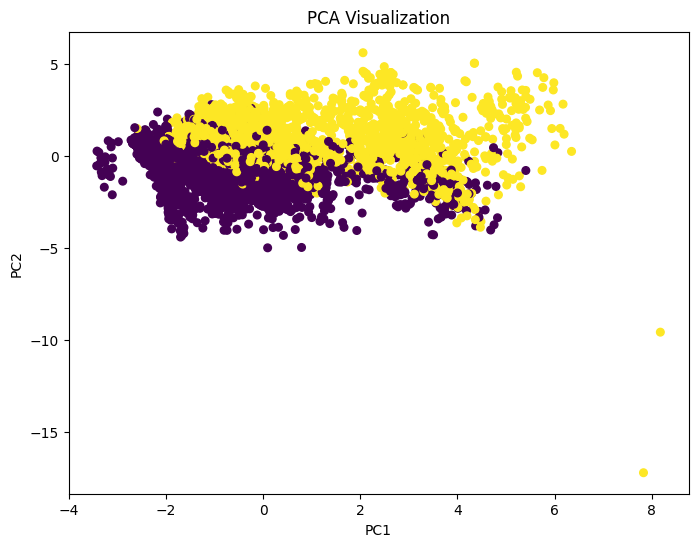

In [140]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_clf, cmap='viridis', s=30)
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# **RANDOM FOREST**

In [138]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(Xc_train_s, yc_train)
y_pred_rf = rf.predict(Xc_test_s)

print("\n--- RANDOM FOREST ---")
print("Accuracy:", accuracy_score(yc_test, y_pred_rf))



--- RANDOM FOREST ---
Accuracy: 0.9191919191919192
